In [ ]:
import pandas as pd
import numpy as np

In [5]:
import requests
from datetime import datetime, timedelta

end_date = datetime.today().date()
start_date = end_date - timedelta(days=30)

url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params = {
    "format": "csv",
    "starttime": str(start_date),
    "endtime": str(end_date),
    "minlatitude": 24,
    "maxlatitude": 46,
    "minlongitude": 123,
    "maxlongitude": 146,
    "minmagnitude": 1
}
response = requests.get(url, params=params)
with open("japan_earthquakes.csv", "w", encoding="utf-8") as f:
        f.write(response.text)


In [6]:
df = pd.read_csv("japan_earthquakes.csv")

In [7]:
df = df.drop(columns=["status","locationSource", "magSource"])

In [8]:
import datetime

def date_objector(string):
    return datetime.datetime.strptime(string, "%Y-%m-%dT%H:%M:%S.%fZ")
df["time"] = df["time"].apply(date_objector)
df["updated"] = df["updated"].apply(date_objector)
# df["time"] = pd.to_datetime(df["time"])
# df["updated"] = pd.to_datetime(df["updated"])

In [9]:
df.shape

(42, 19)

In [10]:
df.dtypes

time               datetime64[ns]
latitude                  float64
longitude                 float64
depth                     float64
mag                       float64
magType                    object
nst                         int64
gap                         int64
dmin                      float64
rms                       float64
net                        object
id                         object
updated            datetime64[ns]
place                      object
type                       object
horizontalError           float64
depthError                float64
magError                  float64
magNst                      int64
dtype: object

In [11]:
num_cols = df.select_dtypes(include=["number"]).columns
df[num_cols] = df[num_cols].astype(float)
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst
0,2025-10-11 03:22:00.952,30.3456,138.4539,432.857,4.8,mb,71.0,49.0,2.994,0.63,us,us6000rghz,2025-10-11 03:38:55.040,"Izu Islands, Japan region",earthquake,8.96,6.664,0.028,385.0
1,2025-10-10 22:06:36.054,41.7258,142.6790,58.696,4.3,mb,35.0,164.0,0.459,1.12,us,us6000rggg,2025-10-10 22:34:36.040,"48 km S of Urakawa, Japan",earthquake,7.90,9.880,0.119,20.0
2,2025-10-07 21:38:37.324,29.2431,129.3903,10.000,5.3,mww,63.0,108.0,2.438,0.83,us,us6000rfh7,2025-10-07 23:28:05.040,"90 km NNW of Tatsugō, Japan",earthquake,3.96,1.851,0.052,36.0
3,2025-10-07 01:42:51.615,37.6701,144.1112,10.000,4.6,mb,45.0,134.0,3.911,0.94,us,us6000rf8c,2025-10-07 01:58:16.040,"249 km ESE of Onagawa Chō, Japan",earthquake,9.93,1.910,0.089,37.0
4,2025-10-07 01:17:17.241,37.8333,144.1149,10.000,4.7,mb,36.0,148.0,3.783,1.06,us,us6000rf80,2025-10-07 01:30:04.040,"243 km ESE of Onagawa Chō, Japan",earthquake,10.35,1.949,0.082,45.0
5,2025-10-07 00:30:23.986,37.5675,141.3033,49.324,5.1,mww,69.0,98.0,2.679,0.55,us,us6000rf7j,2025-10-07 04:10:38.146,"28 km ENE of Namie, Japan",earthquake,7.55,4.763,0.071,19.0
6,2025-10-06 20:02:43.141,27.2131,140.2644,442.455,4.1,mb,42.0,94.0,1.715,0.99,us,us6000rf64,2025-10-06 20:17:41.040,"Bonin Islands, Japan region",earthquake,8.92,9.428,0.069,58.0
7,2025-10-06 18:25:05.232,37.8565,144.0981,10.000,4.7,mb,53.0,130.0,3.756,0.82,us,us6000rf5k,2025-10-06 18:44:09.040,"241 km ESE of Onagawa Chō, Japan",earthquake,9.57,1.910,0.068,66.0
8,2025-10-06 14:57:59.833,37.7601,144.2022,10.000,4.9,mb,108.0,125.0,3.883,0.93,us,us6000rf34,2025-10-07 00:18:28.021,"253 km ESE of Onagawa Chō, Japan",earthquake,8.46,1.867,0.038,218.0
9,2025-10-06 14:20:28.882,37.7685,144.0440,29.711,4.8,mb,81.0,91.0,3.800,0.54,us,us6000rf2y,2025-10-06 14:50:20.040,"239 km ESE of Onagawa Chō, Japan",earthquake,8.70,5.330,0.048,135.0


In [12]:
df.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
dtype: int64

In [13]:
df["Month"] = df["time"].dt.month_name()
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,Month
0,2025-10-11 03:22:00.952,30.3456,138.4539,432.857,4.8,mb,71.0,49.0,2.994,0.63,us,us6000rghz,2025-10-11 03:38:55.040,"Izu Islands, Japan region",earthquake,8.96,6.664,0.028,385.0,October
1,2025-10-10 22:06:36.054,41.7258,142.6790,58.696,4.3,mb,35.0,164.0,0.459,1.12,us,us6000rggg,2025-10-10 22:34:36.040,"48 km S of Urakawa, Japan",earthquake,7.90,9.880,0.119,20.0,October
2,2025-10-07 21:38:37.324,29.2431,129.3903,10.000,5.3,mww,63.0,108.0,2.438,0.83,us,us6000rfh7,2025-10-07 23:28:05.040,"90 km NNW of Tatsugō, Japan",earthquake,3.96,1.851,0.052,36.0,October
3,2025-10-07 01:42:51.615,37.6701,144.1112,10.000,4.6,mb,45.0,134.0,3.911,0.94,us,us6000rf8c,2025-10-07 01:58:16.040,"249 km ESE of Onagawa Chō, Japan",earthquake,9.93,1.910,0.089,37.0,October
4,2025-10-07 01:17:17.241,37.8333,144.1149,10.000,4.7,mb,36.0,148.0,3.783,1.06,us,us6000rf80,2025-10-07 01:30:04.040,"243 km ESE of Onagawa Chō, Japan",earthquake,10.35,1.949,0.082,45.0,October
5,2025-10-07 00:30:23.986,37.5675,141.3033,49.324,5.1,mww,69.0,98.0,2.679,0.55,us,us6000rf7j,2025-10-07 04:10:38.146,"28 km ENE of Namie, Japan",earthquake,7.55,4.763,0.071,19.0,October
6,2025-10-06 20:02:43.141,27.2131,140.2644,442.455,4.1,mb,42.0,94.0,1.715,0.99,us,us6000rf64,2025-10-06 20:17:41.040,"Bonin Islands, Japan region",earthquake,8.92,9.428,0.069,58.0,October
7,2025-10-06 18:25:05.232,37.8565,144.0981,10.000,4.7,mb,53.0,130.0,3.756,0.82,us,us6000rf5k,2025-10-06 18:44:09.040,"241 km ESE of Onagawa Chō, Japan",earthquake,9.57,1.910,0.068,66.0,October
8,2025-10-06 14:57:59.833,37.7601,144.2022,10.000,4.9,mb,108.0,125.0,3.883,0.93,us,us6000rf34,2025-10-07 00:18:28.021,"253 km ESE of Onagawa Chō, Japan",earthquake,8.46,1.867,0.038,218.0,October
9,2025-10-06 14:20:28.882,37.7685,144.0440,29.711,4.8,mb,81.0,91.0,3.800,0.54,us,us6000rf2y,2025-10-06 14:50:20.040,"239 km ESE of Onagawa Chō, Japan",earthquake,8.70,5.330,0.048,135.0,October


In [14]:
def category(mag_str):
    mag = mag_str
    if mag < 4:
        return "Weak" 
    elif 4 <= mag <= 6:
        return "Moderate"
    elif mag > 6:
        return "Strong" 
    
df["Category"] = df["mag"].apply(category)
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,place,type,horizontalError,depthError,magError,magNst,Month,Category
0,2025-10-11 03:22:00.952,30.3456,138.4539,432.857,4.8,mb,71.0,49.0,2.994,0.63,...,us6000rghz,2025-10-11 03:38:55.040,"Izu Islands, Japan region",earthquake,8.96,6.664,0.028,385.0,October,Moderate
1,2025-10-10 22:06:36.054,41.7258,142.6790,58.696,4.3,mb,35.0,164.0,0.459,1.12,...,us6000rggg,2025-10-10 22:34:36.040,"48 km S of Urakawa, Japan",earthquake,7.90,9.880,0.119,20.0,October,Moderate
2,2025-10-07 21:38:37.324,29.2431,129.3903,10.000,5.3,mww,63.0,108.0,2.438,0.83,...,us6000rfh7,2025-10-07 23:28:05.040,"90 km NNW of Tatsugō, Japan",earthquake,3.96,1.851,0.052,36.0,October,Moderate
3,2025-10-07 01:42:51.615,37.6701,144.1112,10.000,4.6,mb,45.0,134.0,3.911,0.94,...,us6000rf8c,2025-10-07 01:58:16.040,"249 km ESE of Onagawa Chō, Japan",earthquake,9.93,1.910,0.089,37.0,October,Moderate
4,2025-10-07 01:17:17.241,37.8333,144.1149,10.000,4.7,mb,36.0,148.0,3.783,1.06,...,us6000rf80,2025-10-07 01:30:04.040,"243 km ESE of Onagawa Chō, Japan",earthquake,10.35,1.949,0.082,45.0,October,Moderate
5,2025-10-07 00:30:23.986,37.5675,141.3033,49.324,5.1,mww,69.0,98.0,2.679,0.55,...,us6000rf7j,2025-10-07 04:10:38.146,"28 km ENE of Namie, Japan",earthquake,7.55,4.763,0.071,19.0,October,Moderate
6,2025-10-06 20:02:43.141,27.2131,140.2644,442.455,4.1,mb,42.0,94.0,1.715,0.99,...,us6000rf64,2025-10-06 20:17:41.040,"Bonin Islands, Japan region",earthquake,8.92,9.428,0.069,58.0,October,Moderate
7,2025-10-06 18:25:05.232,37.8565,144.0981,10.000,4.7,mb,53.0,130.0,3.756,0.82,...,us6000rf5k,2025-10-06 18:44:09.040,"241 km ESE of Onagawa Chō, Japan",earthquake,9.57,1.910,0.068,66.0,October,Moderate
8,2025-10-06 14:57:59.833,37.7601,144.2022,10.000,4.9,mb,108.0,125.0,3.883,0.93,...,us6000rf34,2025-10-07 00:18:28.021,"253 km ESE of Onagawa Chō, Japan",earthquake,8.46,1.867,0.038,218.0,October,Moderate
9,2025-10-06 14:20:28.882,37.7685,144.0440,29.711,4.8,mb,81.0,91.0,3.800,0.54,...,us6000rf2y,2025-10-06 14:50:20.040,"239 km ESE of Onagawa Chō, Japan",earthquake,8.70,5.330,0.048,135.0,October,Moderate


In [20]:
def place(place):
    a = place.split()
    if "of" in a:
        #return " ".join(a[2:]) 
        return " ".join(a[4:])
    else:
        return place
df["region"] = df["place"].apply(place)
df["region"].value_counts()

region
Onagawa Chō, Japan             12
Kurio, Japan                    4
Bonin Islands, Japan region     3
Ōfunato, Japan                  2
Katsuura, Japan                 2
Izu Islands, Japan region       2
Tatsugō, Japan                  1
Tomioka, Japan                  1
Namie, Japan                    1
Urakawa, Japan                  1
Ichihara, Japan                 1
Yonakuni, Japan                 1
Uken, Japan                     1
Iwaki, Japan                    1
Miyako, Japan                   1
Miyakojima, Japan               1
Ōarai, Japan                    1
Hasaki, Japan                   1
Shimoda, Japan                  1
Yamada, Japan                   1
Yoshida-kasugachō, Japan        1
Kaminokuni, Japan               1
Shima, Japan                    1
Name: count, dtype: int64

In [21]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,Month,Category,region
0,2025-10-11 03:22:00.952,30.3456,138.4539,432.857,4.8,mb,71.0,49.0,2.994,0.63,...,2025-10-11 03:38:55.040,"Izu Islands, Japan region",earthquake,8.96,6.664,0.028,385.0,October,Moderate,"Izu Islands, Japan region"
1,2025-10-10 22:06:36.054,41.7258,142.6790,58.696,4.3,mb,35.0,164.0,0.459,1.12,...,2025-10-10 22:34:36.040,"48 km S of Urakawa, Japan",earthquake,7.90,9.880,0.119,20.0,October,Moderate,"Urakawa, Japan"
2,2025-10-07 21:38:37.324,29.2431,129.3903,10.000,5.3,mww,63.0,108.0,2.438,0.83,...,2025-10-07 23:28:05.040,"90 km NNW of Tatsugō, Japan",earthquake,3.96,1.851,0.052,36.0,October,Moderate,"Tatsugō, Japan"
3,2025-10-07 01:42:51.615,37.6701,144.1112,10.000,4.6,mb,45.0,134.0,3.911,0.94,...,2025-10-07 01:58:16.040,"249 km ESE of Onagawa Chō, Japan",earthquake,9.93,1.910,0.089,37.0,October,Moderate,"Onagawa Chō, Japan"
4,2025-10-07 01:17:17.241,37.8333,144.1149,10.000,4.7,mb,36.0,148.0,3.783,1.06,...,2025-10-07 01:30:04.040,"243 km ESE of Onagawa Chō, Japan",earthquake,10.35,1.949,0.082,45.0,October,Moderate,"Onagawa Chō, Japan"
5,2025-10-07 00:30:23.986,37.5675,141.3033,49.324,5.1,mww,69.0,98.0,2.679,0.55,...,2025-10-07 04:10:38.146,"28 km ENE of Namie, Japan",earthquake,7.55,4.763,0.071,19.0,October,Moderate,"Namie, Japan"
6,2025-10-06 20:02:43.141,27.2131,140.2644,442.455,4.1,mb,42.0,94.0,1.715,0.99,...,2025-10-06 20:17:41.040,"Bonin Islands, Japan region",earthquake,8.92,9.428,0.069,58.0,October,Moderate,"Bonin Islands, Japan region"
7,2025-10-06 18:25:05.232,37.8565,144.0981,10.000,4.7,mb,53.0,130.0,3.756,0.82,...,2025-10-06 18:44:09.040,"241 km ESE of Onagawa Chō, Japan",earthquake,9.57,1.910,0.068,66.0,October,Moderate,"Onagawa Chō, Japan"
8,2025-10-06 14:57:59.833,37.7601,144.2022,10.000,4.9,mb,108.0,125.0,3.883,0.93,...,2025-10-07 00:18:28.021,"253 km ESE of Onagawa Chō, Japan",earthquake,8.46,1.867,0.038,218.0,October,Moderate,"Onagawa Chō, Japan"
9,2025-10-06 14:20:28.882,37.7685,144.0440,29.711,4.8,mb,81.0,91.0,3.800,0.54,...,2025-10-06 14:50:20.040,"239 km ESE of Onagawa Chō, Japan",earthquake,8.70,5.330,0.048,135.0,October,Moderate,"Onagawa Chō, Japan"


In [37]:
monthly_category = df.groupby(['Month', 'Category']).agg({'mag': ['count', 'mean'],'depth': 'mean'}).round(2)

print(monthly_category)

                     mag         depth
                   count  mean    mean
Month     Category                    
October   Moderate    17  4.72  104.88
September Moderate    25  4.54   67.19


In [38]:
region_stats = df.groupby('region').agg({'mag': ['count', 'mean', 'max'],'depth': ['mean', 'max'],'latitude': 'mean','longitude': 'mean'}).round(2)

print(region_stats)

                              mag              depth         latitude  \
                            count  mean  max    mean     max     mean   
region                                                                  
Bonin Islands, Japan region     3  4.10  4.2  394.66  442.46    27.64   
Hasaki, Japan                   1  4.50  4.5   25.06   25.06    35.39   
Ichihara, Japan                 1  4.50  4.5  103.24  103.24    35.52   
Iwaki, Japan                    1  4.60  4.6   10.00   10.00    36.36   
Izu Islands, Japan region       2  4.70  4.8  221.43  432.86    30.65   
Kaminokuni, Japan               1  4.10  4.1  286.49  286.49    42.02   
Katsuura, Japan                 2  4.70  4.9   10.00   10.00    33.19   
Kurio, Japan                    4  4.70  4.9   11.91   19.29    29.69   
Miyako, Japan                   1  4.50  4.5   53.25   53.25    39.75   
Miyakojima, Japan               1  4.90  4.9   10.00   10.00    24.08   
Namie, Japan                    1  5.10  5.1   49.3

In [39]:
region_counts = df.groupby('region').size().sort_values(ascending=False)

print(region_counts)

region
Onagawa Chō, Japan             12
Kurio, Japan                    4
Bonin Islands, Japan region     3
Katsuura, Japan                 2
Ōfunato, Japan                  2
Izu Islands, Japan region       2
Ichihara, Japan                 1
Kaminokuni, Japan               1
Iwaki, Japan                    1
Hasaki, Japan                   1
Miyakojima, Japan               1
Namie, Japan                    1
Shima, Japan                    1
Shimoda, Japan                  1
Miyako, Japan                   1
Tatsugō, Japan                  1
Tomioka, Japan                  1
Urakawa, Japan                  1
Uken, Japan                     1
Yamada, Japan                   1
Yonakuni, Japan                 1
Yoshida-kasugachō, Japan        1
Ōarai, Japan                    1
dtype: int64


<Axes: xlabel='region'>

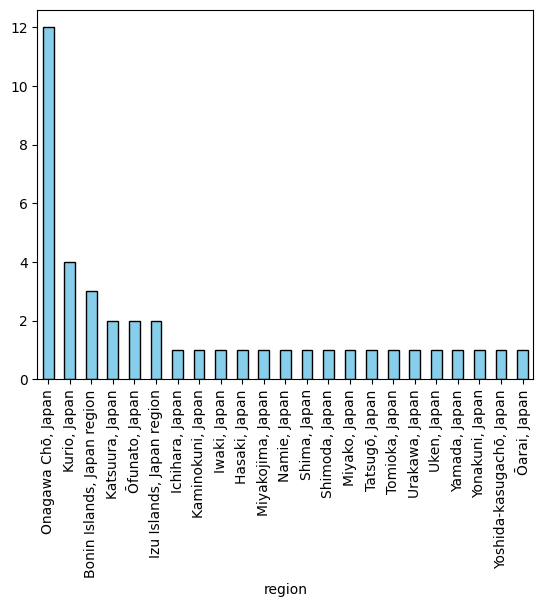

In [40]:
region_counts.plot(kind='bar', color='skyblue', edgecolor='black')
